# Mean of maximal temperatures per city

In [129]:
import pandas as pd
df_city_tmax = pd.read_csv('city_mean_tmax.TXT-00000-OF-00001', names=['city', 'mean_tmax'])

In [130]:
df_city_tmax

,city,mean_tmax
0,wrong_input,0.000
1,São Gonçalo,24.249
2,Vitória,24.520
3,Santa Teresa,17.908
4,Linhares,23.804
...,...,...
113,Barra do Turvo,15.356
114,Pradópolis,22.962
115,Barretos,23.606
116,Ituverava,20.823


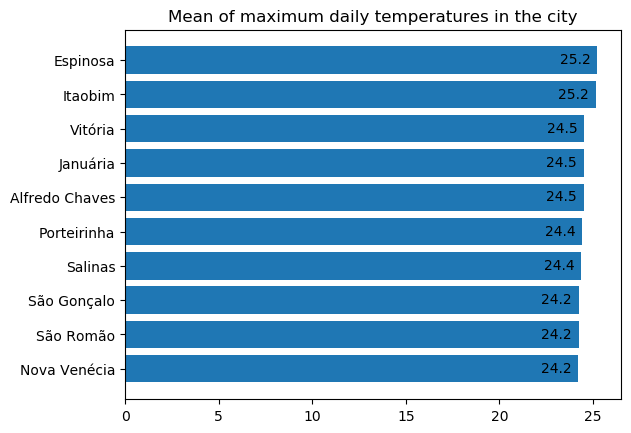

In [131]:
import matplotlib.pyplot as plt

N_cities = 10 # num of hotest cities to display

# df filtration
df_plt = df_city_tmax[df_city_tmax['city'] != 'wrong_input'] # filter out row with wrong input
df_plt = df_plt.sort_values(by=['mean_tmax'], ascending=False)[:N_cities]

# ploting
fig, ax = plt.subplots()

cities = df_plt['city']
y_pos = list(range(len(cities)))
mean_tmax = df_plt['mean_tmax']

# display temperatures at the bar edge
for i, t in enumerate(df_plt['mean_tmax'].to_list()):
    ax.text(t - 2, i+.1, '{:.1f}'.format(t))

ax.barh(y_pos, mean_tmax)
ax.set_yticks(y_pos)
ax.set_yticklabels(cities)
ax.invert_yaxis()
ax.set_title('Mean of maximum daily temperatures in the city')

plt.show()

# Number of records per city

In [132]:
import pandas as pd
df_city_count = pd.read_csv('city_num_records.TXT-00000-OF-00001', names=['city', 'num_records'])

In [133]:
df_city_count.sort_values(by=['num_records'], ascending=False)[:10]

,city,num_records
70,Rio de Janeiro,302352
74,Campos dos Goytacazes,160584
69,Seropédica,143376
87,Bauru,132264
88,Campos do Jordão,127580
71,Duque de Caxias,122256
72,Cambuci,121536
11,Barbacena,121176
90,Franca,121008
15,Almenara,120936


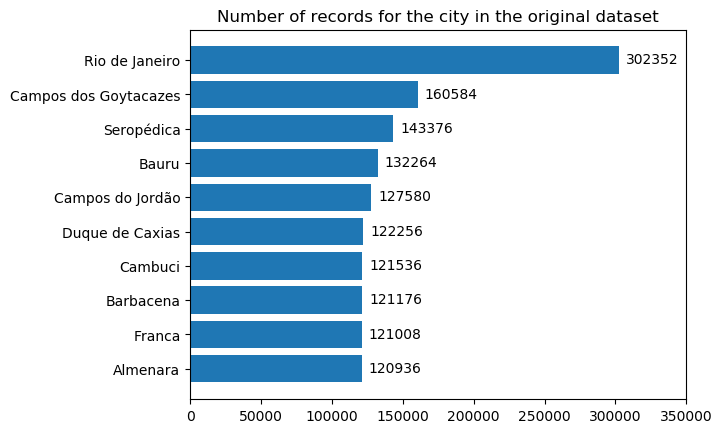

In [134]:
import matplotlib.pyplot as plt

N_cities = 10 # num of cities with largest number of records to display

# df filtration
df_plt = df_city_count[df_city_count['city'] != 'wrong_input'] # filter out row with wrong input
df_plt = df_plt.sort_values(by=['num_records'], ascending=False)[:N_cities]

# ploting
fig, ax = plt.subplots()

cities = df_plt['city']
y_pos = list(range(len(cities)))
num_records = df_plt['num_records']

# display temperatures at the bar edge
for i, t in enumerate(df_plt['num_records'].to_list()):
    ax.text(t + 5000, i+.1, t)

ax.barh(y_pos, num_records)
ax.set_xlim([0, 350000])
ax.set_yticks(y_pos)
ax.set_yticklabels(cities)
ax.invert_yaxis()
ax.set_title('Number of records for the city in the original dataset')

plt.show()

# Vizualization with procesing by pandas
- This part is only to check if the number obtained with Apache beam are correct

In [9]:
import pandas as pd
df = pd.read_csv('sudeste.csv')

In [14]:
df.head()

,wsid,wsnm,elvt,lat,lon,inme,city,prov,mdct,date,...,tmax,dmax,tmin,dmin,hmdy,hmax,hmin,wdsp,wdct,gust
0,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 00:00:00,2007-11-06,...,29.7,16.8,25.5,10.8,35.0,58.0,32.0,3.2,101.0,6.5
1,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 01:00:00,2007-11-06,...,29.9,13.6,29.0,12.2,39.0,39.0,35.0,3.6,94.0,6.4
2,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 02:00:00,2007-11-06,...,29.0,14.0,27.4,13.6,44.0,44.0,39.0,2.5,93.0,6.9
3,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 03:00:00,2007-11-06,...,27.4,16.9,25.8,14.1,58.0,58.0,44.0,1.7,96.0,5.8
4,178,SÃO GONÇALO,237.0,-6.835777,-38.311583,A333,São Gonçalo,RJ,2007-11-06 04:00:00,2007-11-06,...,26.3,17.0,25.3,16.4,57.0,58.0,56.0,3.1,110.0,7.5


In [21]:
print('number of rows in the dataset:', len(df))

number of rows in the dataset: 9779168


In [23]:
print('Columns in dataset:\n', df.columns)

Columns in dataset:
 Index(['wsid', 'wsnm', 'elvt', 'lat', 'lon', 'inme', 'city', 'prov', 'mdct',
       'date', 'yr', 'mo', 'da', 'hr', 'prcp', 'stp', 'smax', 'smin', 'gbrd',
       'temp', 'dewp', 'tmax', 'dmax', 'tmin', 'dmin', 'hmdy', 'hmax', 'hmin',
       'wdsp', 'wdct', 'gust'],
      dtype='object')


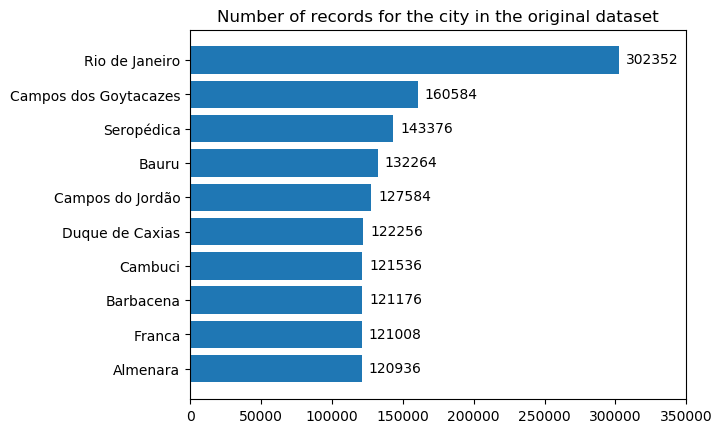

In [110]:
import matplotlib.pyplot as plt

N_cities = 10 # num of hotest cities to display

temp_value_counts = df['city'].value_counts().head(N_cities)
cities = temp_value_counts.index.to_list()
y_pos = list(range(len(cities)))
num_records = temp_value_counts.to_list()

# ploting
fig, ax = plt.subplots()

# display temperatures at the bar edge
for i, t in enumerate(num_records):
    ax.text(t + 5000, i+.1, t)

ax.barh(y_pos, num_records)
ax.set_xlim([0, 350000])
ax.set_yticks(y_pos)
ax.set_yticklabels(cities)
ax.invert_yaxis()
ax.set_title('Number of records for the city in the original dataset')

plt.show()

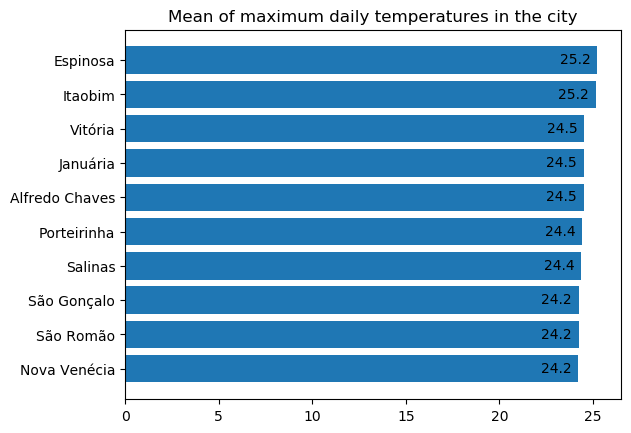

In [120]:
import matplotlib.pyplot as plt

N_cities = 10 # num of hotest cities to display

# ploting
fig, ax = plt.subplots()

y_pos = list(range(len(cities)))
cities = df.groupby('city').tmax.mean().sort_values(ascending=False).head(N_cities).index.to_list()
mean_tmax = df.groupby('city').tmax.mean().sort_values(ascending=False).head(N_cities).to_list()


# display temperatures at the bar edge
for i, t in enumerate(mean_tmax):
    ax.text(t - 2, i+.1, '{:.1f}'.format(t))

ax.barh(y_pos, mean_tmax)
ax.set_yticks(y_pos)
ax.set_yticklabels(cities)
ax.invert_yaxis()
ax.set_title('Mean of maximum daily temperatures in the city')

plt.show()